# Table of Contents
1. [Wunderground](#Weather-using-Weather-Underground)
2. [Choropleth Maps](#Choropleth-Maps)
3. [Python and Pandas for Sentiment Analysis and Investing](#Python-and-Pandas-for-Sentiment-Analysis-and-Investing)
4. [Stock Market Prediction with Time Series Estimators](#Stock-Market-Prediction-with-Time-Series-Estimators)
5. [Automated Trading in Python](#Automated-trading-in-Python)
6. [Text Analysis](#Text-Analysis)

## Weather using Weather Underground
[Top](#table-of-contents)

In [ ]:
#weather from wunderground
import urllib.request as request
import json

key = '0367ba8afed8e433'
zip_code = input('For which ZIP code would you like to see the weather? ')
fileName = "http://api.wunderground.com/api/" + key +    "/geolookup/conditions/q/PA/" + zip_code + ".json"
f = request.urlopen(fileName)
json_string = f.read().decode('utf-8')
parsed_json = json.loads(json_string)
location = parsed_json['location']['city']
temp_f = parsed_json['current_observation']['temp_f']
print ("Current temperature in %s is: %s" % (location, temp_f))

In [ ]:
#this one keeps asking for zip so need to figure out how to get out of loop
import urllib.request as request
import json

key = '0367ba8afed8e433'
while 1:
    zip_code = input('For which ZIP code would you like to see the weather? ')
    fileName = "http://api.wunderground.com/api/" + key +    "/geolookup/conditions/q/PA/" + zip_code + ".json"
    f = request.urlopen(fileName)
    json_string = f.read().decode('utf-8')
    parsed_json = json.loads(json_string)
    city = parsed_json['location']['city']
    state = parsed_json['location']['state']
    weather = parsed_json['current_observation']['weather']
    temperature_string = parsed_json['current_observation']['temperature_string']
    feelslike_string = parsed_json['current_observation']['feelslike_string']
    print ("Weather in " + city + "," + weather.lower() + ".The temperature is " + temperature_string + "but it feels like " + feelslike_string + ".")
    f.close()       

In [ ]:
#this one ends after one zipcode input
import urllib.request as request
import json

key = '0367ba8afed8e433'

zip_code = input('For which ZIP code would you like to see the weather? ')
fileName = "http://api.wunderground.com/api/" + key +    "/geolookup/conditions/q/PA/" + zip_code + ".json"
f = request.urlopen(fileName)
json_string = f.read().decode('utf-8')
parsed_json = json.loads(json_string)
city = parsed_json['location']['city']
state = parsed_json['location']['state']
weather = parsed_json['current_observation']['weather']
temperature_string = parsed_json['current_observation']['temperature_string']
feelslike_string = parsed_json['current_observation']['feelslike_string']
print ("Weather in " + city + "," + weather.lower() + ".The temperature is " + temperature_string + "but it feels like " + feelslike_string + ".")


In [ ]:
import urllib.request as request
import json

key = '0367ba8afed8e433'
zip_code = input('For which ZIP code would you like to see the weather? ')
fileName = "http://api.wunderground.com/api/" + key +    "/geolookup/forecast10day/q/" + zip_code + ".json"
f = request.urlopen(fileName)
json_string = f.read().decode('utf-8')
parsed_json = json.loads(json_string)
for day in parsed_json['forecast']['simpleforecast']['forecastday']:
    print(day['date']['weekday'] + ' (' + day['date']['pretty'] + '):')
    print(' Conditions: ' + day['conditions'])
    # this prints abbrev for  condition print(' Icon: ' + day['icon'])
    print(' High: ' + day['high']['fahrenheit'] + 'F')
    print(' Low: ' + day['low']['fahrenheit'] + 'F')
f.close()

### Choropleth Maps
[Top](#table-of-contents)

In [ ]:
import vincent
geo_data = [{'name': 'countries',
             'url': 'world_topo',
             'feature': 'world-countries'}]

vis = vincent.Map(geo_data=geo_data, scale=200)
vis.to_json('vega.json')

In [ ]:
#Data setup bit - Input[1] from your notebook
#Note new name for country code country_alpha3

import pandas as pd
import numpy as np

country_data_tmp = pd.DataFrame({'country_names' : np.array(['Argentina', 'Armenia', 'Australia', 'Austria']),
                                 'country_alpha3' : np.array(['ARG','ARM','AUS','AUT']),
                                 'my_rate' : np.array([0.254, 0.3456, 0.26, 0.357])})
country_data_tmp.head()

#map drawing bit Input[2] from your notebook
#Note the changes in variable names

world_topo = r'world-countries.topo.json'

geo_data = [{'name': 'countries',
             'url': world_topo,
             'feature': 'world-countries'}]

vis = vincent.Map(data=country_data_tmp, 
                  geo_data=geo_data, 
                  scale=1100, 
                  data_bind='my_rate', 
                  data_key='country_alpha3',
                  map_key={'countries': 'id'})

vis.display()

In [ ]:
#prints off http://bokeh.pydata.org/en/latest/docs/gallery/texas.html
import bokeh.sampledata
bokeh.sampledata.download()
from bokeh.models import HoverTool
from bokeh.plotting import figure, show, output_file, ColumnDataSource
from bokeh.sampledata.us_counties import data as counties
from bokeh.sampledata.unemployment import data as unemployment

counties = {
    code: county for code, county in counties.items() if county["state"] == "tx"
}

county_xs = [county["lons"] for county in counties.values()]
county_ys = [county["lats"] for county in counties.values()]

colors = ["#F1EEF6", "#D4B9DA", "#C994C7", "#DF65B0", "#DD1C77", "#980043"]

county_names = [county['name'] for county in counties.values()]
county_rates = [unemployment[county_id] for county_id in counties]
county_colors = [colors[int(rate/3)] for rate in county_rates]

source = ColumnDataSource(data=dict(
    x=county_xs,
    y=county_ys,
    color=county_colors,
    name=county_names,
    rate=county_rates,
))

TOOLS="pan,wheel_zoom,box_zoom,reset,hover,save"

p = figure(title="Texas Unemployment 2009", tools=TOOLS)

p.patches('x', 'y', source=source,
          fill_color='color', fill_alpha=0.7,
          line_color="white", line_width=0.5)

hover = p.select_one(HoverTool)
hover.point_policy = "follow_mouse"
hover.tooltips = [
    ("Name", "@name"),
    ("Unemployment rate)", "@rate%"),
    ("(Long, Lat)", "($x, $y)"),
]

output_file("texas.html", title="texas.py example")

show(p)

In [ ]:
from bokeh.plotting import figure, show, output_file
from bokeh.sampledata.us_counties import data as counties
from bokeh.sampledata.us_states import data as states
from bokeh.sampledata.unemployment import data as unemployment

del states["HI"]
del states["AK"]

EXCLUDED = ("ak", "hi", "pr", "gu", "vi", "mp", "as")

state_xs = [states[code]["lons"] for code in states]
state_ys = [states[code]["lats"] for code in states]

county_xs=[counties[code]["lons"] for code in counties if counties[code]["state"] not in EXCLUDED]
county_ys=[counties[code]["lats"] for code in counties if counties[code]["state"] not in EXCLUDED]

colors = ["#F1EEF6", "#D4B9DA", "#C994C7", "#DF65B0", "#DD1C77", "#980043"]

county_colors = []
for county_id in counties:
    if counties[county_id]["state"] in EXCLUDED:
        continue
    try:
        rate = unemployment[county_id]
        idx = int(rate/6)
        county_colors.append(colors[idx])
    except KeyError:
        county_colors.append("black")

p = figure(title="US Unemployment 2009", toolbar_location="left",
           plot_width=1100, plot_height=700)

p.patches(county_xs, county_ys,
          fill_color=county_colors, fill_alpha=0.7,
          line_color="white", line_width=0.5)

p.patches(state_xs, state_ys, fill_alpha=0.0,
          line_color="#884444", line_width=2, line_alpha=0.3)

output_file("choropleth.html", title="choropleth.py example")

show(p)

In [ ]:
import json
import pandas as pd
{
  "name": "us-atlas",
  "version": "0.0.4",
  "description": "Roll your own TopoJSON from the National Atlas one million-scale dataset.",
  "keywords": [
    "topojson",
    "geojson",
    "shapefile"
  ],
  "author": {
    "name": "Mike Bostock",
    "url": "http://bost.ocks.org/mike"
  },
  "repository": {
    "type": "git",
    "url": "http://github.com/mbostock/us-atlas.git"
  },
  "devDependencies": {
    "shapefile": "0.1",
    "topojson": ">=1.6.2 <2"
  },
  "optionalDependencies": {
    "canvas": "1",
    "d3": "3"
  }
}


#Map the county codes we have in our geometry to those in the
#county_data file, which contains additional rows we don't need
with open('us_counties.topo.json', 'r') as f:
    get_id = json.load(f)

#A little FIPS code munging
new_geoms = []
for geom in get_id['objects']['us_counties.geo']['geometries']:
    geom['properties']['FIPS'] = int(geom['properties']['FIPS'])
    new_geoms.append(geom)

get_id['objects']['us_counties.geo']['geometries'] = new_geoms

with open('us_counties.topo.json', 'w') as f:
    json.dump(get_id, f)

#Grab the FIPS codes and load them into a dataframe
geometries = get_id['objects']['us_counties.geo']['geometries']
county_codes = [x['properties']['FIPS'] for x in geometries]
county_df = pd.DataFrame({'FIPS': county_codes}, dtype=str)
county_df = county_df.astype(int)

#Read into Dataframe, cast to string for consistency
df = pd.read_csv('data/us_county_data.csv', na_values=[' '])
df['FIPS_Code'] = df['FIPS'].astype(str)

#Perform an inner join, pad NA's with data from nearest county
merged = pd.merge(df, county_df, on='FIPS', how='inner')
merged = merged.fillna(method='pad')

geo_data = [{'name': 'counties',
             'url': county_topo,
             'feature': 'us_counties.geo'}]

vis = Map(data=merged, geo_data=geo_data, scale=1100, projection='albersUsa',
          data_bind='Employed_2011', data_key='FIPS',
          map_key={'counties': 'properties.FIPS'})
vis.marks[0].properties.enter.stroke_opacity = ValueRef(value=0.5)
vis.to_json('vega.json')

In [ ]:
# https://github.com/Prooffreader/chorogrid/blob/master/tutorial_2_Chorogrid.ipynb

In [ ]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from geonamescache import GeonamesCache
#from helpers import slug
from matplotlib.patches import Polygon
from matplotlib.collections import PatchCollection
from mpl_toolkits.basemap import Basemap

filename = 'csv/ag.lnd.frst.zs_Indicator_en_csv_v2/ag.lnd.frst.zs_Indicator_en_csv_v2.csv'
shapefile = 'shp/countries/ne_10m_admin_0_countries_lakes'
num_colors = 9
year = '2012'
cols = ['Country Name', 'Country Code', year]
title = 'Forest area as percentage of land area in {}'.format(year)
imgfile = 'img/{}.png'.format(slug(title))


In [ ]:
import folium
import pandas as pd
from folium.plugins import MarkerCluster
SF_COORDINATES = (37.76, -122.45)
crimedata = pd.read_csv('SFPD_Incidents_-_Previous_Year__2015_.csv')

#for speed purposes
MAX_RECORDS = 1000

# create empty map zoomed in on San Francisco
map = folium.Map(location=SF_COORDINATES, zoom_start=12)

# add a marker for every record in the filtered data, use a clustered view
for each in crimedata[0:MAX_RECORDS].iterrows():
    map.simple_marker(location = [each[1]['Y'],each[1]['X']],cluster_marker= True)
display(map)

In [ ]:
import pandas as pd, numpy as np, matplotlib.pyplot as plt
import matplotlib.colors as colors, matplotlib.colorbar as colorbar 
import matplotlib.cm as cm, matplotlib.font_manager as fm
from matplotlib.patches import Polygon
from matplotlib.collections import PatchCollection
#from mpl_toolkits.basemap import Basemap
%matplotlib inline

In [ ]:
# define the fonts to use for plots
family = 'Myriad Pro'
title_font = fm.FontProperties(family=family, style='normal', size=24, weight='normal', stretch='normal')
label_font = fm.FontProperties(family=family, style='normal', size=18, weight='normal', stretch='normal')
ticks_font = fm.FontProperties(family=family, style='normal', size=16, weight='normal', stretch='normal')
annot_font = fm.FontProperties(family=family, style='normal', size=12, weight='normal', stretch='normal')

In [ ]:
def get_colors(cmap, n, start=0., stop=1., alpha=1., reverse=False):
    '''return n-length list of rgba colors from the passed colormap name and alpha,
       limit extent by start/stop values and reverse list order if flag is true'''
    import matplotlib.cm as cm, numpy as np
    colors = [cm.get_cmap(cmap)(x) for x in np.linspace(start, stop, n)]
    colors = [(r, g, b, alpha) for r, g, b, _ in colors]
    return list(reversed(colors)) if reverse else colors

In [ ]:
import pandas as pd
df = pd.read_csv('country_names_codes.csv')
df

In [ ]:
# define map colors
cholorpleth_color_map = 'viridis'
water_color = '#dddddd'
border_color = '#ffffff'
no_data_color = '#ffffff'
map_boundary_color = '#999999'


In [ ]:
# now create the map: first set up the plotting figure
shapefile = 'data/countries_110m/ne_110m_admin_0_countries'
fig = plt.figure(figsize=[14, 8])
ax = fig.add_subplot(111, axisbg=water_color, frame_on=False)
ax.set_title('UN Population Growth Projections, 2015-2100', fontproperties=title_font, y=1.01)

# draw the basemap and read the shapefile
m = Basemap(lon_0=0, projection='kav7', resolution=None)
m.drawmapboundary(color=map_boundary_color)
m.readshapefile(shapefile, name='shapes', drawbounds=False)

# draw each shape, colored according to country's bin
for info, shape in zip(m.shapes_info, m.shapes):
    country_code = info['iso_n3']    
    if country_code in df['country_code'].values:
        bin_num = df[df['country_code']==country_code]['bin'].iloc[0]
        color = color_list[bin_num]
    else:
        color = no_data_color #if no data
    pc = PatchCollection([Polygon(np.array(shape), True)])
    pc.set_facecolor(color)
    pc.set_edgecolor(border_color)
    pc.set_linewidth(0.5)
    ax.add_collection(pc)

# draw color legend (lengths are ratios of figure size)
legend_width = 0.375
legend_left = (1 - legend_width) / 2.
legend_bottom = 0.07
legend_height = 0.03
legend_axis = fig.add_axes([legend_left, legend_bottom, legend_width, legend_height], zorder=2)
cmap = colors.ListedColormap(color_list)
cb = colorbar.ColorbarBase(legend_axis, cmap=cmap, ticks=label_ticks, boundaries=label_ticks, orientation='horizontal')
cb.ax.set_xticklabels(labels, fontproperties=annot_font)

fig.tight_layout()
fig.savefig('images/projected-pop-map.png', dpi=96)
plt.show()


## Python and Pandas for Sentiment Analysis and Investing
[Top](#table-of-contents)
#### http://fxgears.com/forum/index.php?topic=361.0

In [ ]:
import pandas as pd
from pandas import DataFrame
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import style

style.use('ggplot')

def modifyDataset():
    df = pd.read_csv('stocks_sentdex.csv')
    df['time'] = pd.to_datetime(df['time'],unit='s')
    df = df.set_index('time')
    del df['id']
    df.to_csv('stocks_sentdex_datesfull.csv')
modifyDataset()


C:\Users\msteinme\AppData\Local\Continuum\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3012: DtypeWarning: Columns (3,4,5,6) have mixed types. Specify dtype option on import or set low_memory=False.
  if self.run_code(code, result):


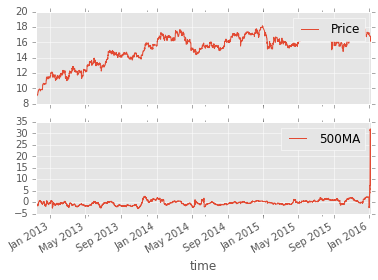

In [1]:
import pandas as pd
from pandas import DataFrame
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import style
%matplotlib inline
style.use('ggplot')

def single_stock(stock_name):
    df = pd.read_csv('stocks_sentdex_datesfull.csv',index_col='time',parse_dates=True)
    df = df[df.type == stock_name.lower()]
    _500MA = pd.rolling_mean(df['value'],500)
    ax1 = plt.subplot(2,1,1)
    df['close'] = df['close'].astype(float)
    df['value'] = df['value'].astype(float)
    df['close'].plot(label='Price')
    plt.legend()
    
    ax2 = plt.subplot(2,1,2, sharex = ax1)
    _500MA.plot(label='500MA')
    plt.legend()
    
    plt.show()
single_stock('bac')


In [ ]:

def outlier_fixing(stock_name):
    df = pd.read_csv('stocks_sentdex_datesfull.csv',index_col='time',parse_dates=True)
    df = df[df.type == stock_name.lower()]
    std = pd.rolling_std(df['close'], 25, min_periods=1)
    ax1 = plt.subplot(2,1,1)
    df['close'] = df['close'].astype(float)
    df['close'].plot(label='Price')
    plt.legend()
    
    ax2 = plt.subplot(2,1,2, sharex = ax1)
    std.plot(label='Deviation')
    plt.legend()
    plt.show()
outlier_fixing('btcusd')

In [ ]:
#now say above std of 20 is bad
def outlier_fixing(stock_name):
    df = pd.read_csv('stocks_sentdex_datesfull.csv',index_col='time',parse_dates=True)
    df = df[df.type == stock_name.lower()]
    df['std'] = pd.rolling_std(df['close'], 25, min_periods = 1)
    df = df[df['std']<20]
    ax1 = plt.subplot(2,1,1)
    df['close'] = df['close'].astype(float)
    df['close'].plot(label='Price')
    plt.legend()
    
    ax2 = plt.subplot(2,1,2, sharex = ax1)
    df['std'].plot(label='Deviation')
    plt.legend()
    plt.show()
    
outlier_fixing('btcusd')

In [ ]:
def single_stock_auto_MA(stock_name):
    df = pd.read_csv('stocks_sentdex_datesfull.csv',index_col='time',parse_dates=True)
    df = df[df.type == stock_name.lower()]   
    count = df['type'].value_counts()
    count = int(count[stock_name])
    #I added MA part after printing the count gave me 45795, this will be different for each of the stocks
    MA1 = pd.rolling_mean(df['value'],(count/458))#100
    MA2 = pd.rolling_mean(df['value'], (count/183)) #250 so did 45795/250 to get denominator
    MA3 = pd.rolling_mean(df['value'], (count/92)) #500
    MA4 = pd.rolling_mean(df['value'], (count/9.2)) #5000

    ax1 = plt.subplot(2,1,1)
    df['close'] = df['close'].astype(float)
    df['close'].plot(label='Price')
    plt.legend()
                          
    ax2 = plt.subplot(2,1,2,sharex = ax1)
    MA1.plot(label=(str(round((count/458),1))+'MA'))
    MA2.plot(label=(str(round((count/183),1))+'MA'))
    MA3.plot(label=(str(round((count/92),1))+'MA'))
    MA4.plot(label=(str(round((count/9.2),1))+'MA'))
    plt.legend()
    plt.show()
                          
single_stock_auto_MA('bac')

In [ ]:
#new modification
import math 

def single_stock_auto_MA(stock_name, div1=458, div2=183, div3=92, div4=9.2):
    df = pd.read_csv('stocks_sentdex_datesfull.csv',index_col='time',parse_dates=True)
    df = df[df.type == stock_name.lower()]   
    count = df['type'].value_counts()
    count = int(count[stock_name])
    #I added MA part after printing the count gave me 45795, this will be different for each of the stocks
    MA1 = pd.rolling_mean(df['value'],(count/div1))#100
    MA2 = pd.rolling_mean(df['value'], (count/div2)) #250 so did 45795/250 to get denominator
    MA3 = pd.rolling_mean(df['value'], (count/div3)) #500
    MA4 = pd.rolling_mean(df['value'], (count/div4)) #5000
    
    #ceil rounds up, ceiling of number
    SP = int(math.ceil(count/div4))
    
    df['MA1'] = MA1
    df['MA2'] = MA2
    df['MA3'] = MA3
    df['MA4'] = MA4
    
    df = df[SP:]
    
    ax1 = plt.subplot(2,1,1)
    df['close'] = df['close'].astype(float)
    df['close'].plot(label='Price')
    plt.legend()
                          
    ax2 = plt.subplot(2,1,2,sharex = ax1)
    df['MA1'].plot(label=(str(round((count/div1),1))+'MA'))
    df['MA2'].plot(label=(str(round((count/div2),1))+'MA'))
    df['MA3'].plot(label=(str(round((count/div3),1))+'MA'))
    df['MA4'].plot(label=(str(round((count/div4),1))+'MA'))
    plt.legend()
    plt.show()
                          
single_stock_auto_MA('bac')

In [4]:
import pandas as pd
import time
import math
from pandas import DataFrame
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import style

def calc_position(ma1, ma2, ma3, ma4):
    if ma4 > ma1 > ma2 > ma3:
        return 1
    elif ma1 > ma4 > ma2 > ma3:
        return 2
    elif ma1 > ma2 > ma4 > ma3:
        return 3
    elif ma1 > ma2 > ma3 > ma4:
        return 4
    elif ma1 < ma2 < ma3 < ma4:
        return -4
    elif ma1 < ma2 < ma4 < ma3:
        return -3
    elif ma1 < ma4 < ma2 < ma3:
        return -2
    elif ma4 < ma1 < ma2 < ma3:
        return -1
    else:
        return None

def single_stock_auto_MA(stock_name, div1=458, div2=183, div3=92, div4=9.2):
    df = pd.read_csv('stocks_sentdex_datesfull.csv',index_col='time',parse_dates=True)
    df = df[df.type == stock_name.lower()]   
    count = df['type'].value_counts()
    count = int(count[stock_name])
    #I added MA part after printing the count gave me 45795, this will be different for each of the stocks
    MA1 = pd.rolling_mean(df['value'],(count/div1))#100
    MA2 = pd.rolling_mean(df['value'], (count/div2)) #250 so did 45795/250 to get denominator
    MA3 = pd.rolling_mean(df['value'], (count/div3)) #500
    MA4 = pd.rolling_mean(df['value'], (count/div4)) #5000
    
    #ceil rounds up, ceiling of number
    SP = int(math.ceil(count/div4))
    
    df['MA1'] = MA1
    df['MA2'] = MA2
    df['MA3'] = MA3
    df['MA4'] = MA4
    
    df = df[SP:]
    del df['MA100']
    del df['MA250']
    del df['MA500']
    del df['MA5000']
    
    df['Pos'] = list(map(calc_position, df['MA1'], df['MA2'], df['MA3'], df['MA4']))
    #this occured below when I didn't put list in front due to the fact that I am using python 3  instead of 2
    # print(df[:100]), after this command it said no numbers in pos column which is worrisome, just said map object at
    #<0x0000000101653AC8> 
    df['Change'] = df['Pos'].diff()
    #print(df[100:200])
    
    '''
    ax1 = plt.subplot(2,1,1)
    df['close'] = df['close'].astype(float)
    df['close'].plot(label='Price')
    plt.legend()
                          
    ax2 = plt.subplot(2,1,2,sharex = ax1)
    df['MA1'].plot(label=(str(round((count/div1),1))+'MA'))
    df['MA2'].plot(label=(str(round((count/div2),1))+'MA'))
    df['MA3'].plot(label=(str(round((count/div3),1))+'MA'))
    df['MA4'].plot(label=(str(round((count/div4),1))+'MA'))
    plt.legend()
    plt.show()
    '''
    return df

def backTest(datas, closei, changei):
    stockHoldings = 0
    startingCapital = datas['close'][0] * 8 
    funds = startingCapital
    currentValuation = funds
    
    for row in datas.iterrows():
        try:
            index,data = row
            rowData = data.tolist()
            price = rowData[closei]
            change = int(rowData[changei])
            
            if isinstance(change, (int, int)) and change != 0: #was (int,long) but long was not recognized in python 3
                if change > 0:          #can we afford purchase
                    if(change * price) < funds:
                        funds -= (change * price)
                        stockHoldings += change
                        currentValuation = funds + (stockHoldings * price)
                    else:
                        pass  #don't have funds for purchase
                elif change < 0: #make sale
                    change = abs(change)
                    if stockHoldings == 0:
                        pass
                    elif (stockHoldings - change) < 0:
                        change = stockHoldings
                    else:
                        stockHoldings -= change
                        funds += (change * price)
                        currentValuation = funds + (stockHoldings * price)
                    
        except:
            pass
        
    print('Holdings:', stockHoldings)
    print('Funds:',funds)
    print('Starting Funds:', startingCapital)
    print('Current Valuation:', currentValuation)
    perChange = ((currentValuation - startingCapital)/startingCapital)*100.00
    print('Strategy Percent Growth:',perChange)
    
data = single_stock_auto_MA('c')
backTest(data, closei=3, changei=11)   

Holdings: 0
Funds: 338.72
Starting Funds: 338.72
Current Valuation: 338.72
Strategy Percent Growth: 0.0


C:\Users\msteinme\AppData\Local\Continuum\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3006: DtypeWarning: Columns (3,4,5,6) have mixed types. Specify dtype option on import or set low_memory=False.
  if self.run_code(code, result):


In [1]:
#look at multiple companies, video 11
# https://www.youtube.com/watch?v=R5ut78P6-GQ
import pandas as pd
import time
import math
from pandas import DataFrame
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import style

def calc_position(ma1, ma2, ma3, ma4):
    if ma4 > ma1 > ma2 > ma3:
        return 1
    elif ma1 > ma4 > ma2 > ma3:
        return 2
    elif ma1 > ma2 > ma4 > ma3:
        return 3
    elif ma1 > ma2 > ma3 > ma4:
        return 4
    elif ma1 < ma2 < ma3 < ma4:
        return -4
    elif ma1 < ma2 < ma4 < ma3:
        return -3
    elif ma1 < ma4 < ma2 < ma3:
        return -2
    elif ma4 < ma1 < ma2 < ma3:
        return -1
    else:
        return None

def single_stock_auto_MA(stock_name, div1=458, div2=183, div3=92, div4=9.2):   #MA smooths out the data a bit
    df = pd.read_csv('stocks_sentdex_datesfull.csv',index_col='time',parse_dates=True)
    df = df[df.type == stock_name.lower()]   
    count = df['type'].value_counts()
    count = int(count[stock_name])
    #I added MA part after printing the count gave me 45795, this will be different for each of the stocks
    MA1 = pd.rolling_mean(df['value'],(count/div1))#100
    MA2 = pd.rolling_mean(df['value'], (count/div2)) #250 so did 45795/250 to get denominator
    MA3 = pd.rolling_mean(df['value'], (count/div3)) #500
    MA4 = pd.rolling_mean(df['value'], (count/div4)) #5000
    
    #ceil rounds up, ceiling of number
    SP = int(math.ceil(count/div4))
    
    df['MA1'] = MA1
    df['MA2'] = MA2
    df['MA3'] = MA3
    df['MA4'] = MA4
    
    df = df[SP:]
    del df['MA100']
    del df['MA250']
    del df['MA500']
    del df['MA5000']
    
    df['Pos'] = list(map(calc_position, df['MA1'], df['MA2'], df['MA3'], df['MA4']))
    #this occured below when I didn't put list in front due to the fact that I am using python 3  instead of 2
    # print(df[:100]), after this command it said no numbers in pos column which is worrisome, just said map object at
    #<0x0000000101653AC8> 
    df['Change'] = df['Pos'].diff()
    #print(df[100:200])
    
    '''
    ax1 = plt.subplot(2,1,1)
    df['close'] = df['close'].astype(float)
    df['close'].plot(label='Price')
    plt.legend()
                          
    ax2 = plt.subplot(2,1,2,sharex = ax1)
    df['MA1'].plot(label=(str(round((count/div1),1))+'MA'))
    df['MA2'].plot(label=(str(round((count/div2),1))+'MA'))
    df['MA3'].plot(label=(str(round((count/div3),1))+'MA'))
    df['MA4'].plot(label=(str(round((count/div4),1))+'MA'))
    plt.legend()
    plt.show()
    '''
    df.sort_index(inplace=True) #sorts by numbers or words
    return df

def backTest(datas, closei, changei):
    stockHoldings = 0
    startingCapital = datas['close'][0] * 8 
    funds = startingCapital
    currentValuation = funds
    
    name = datas['type'][0]
    perf_array = [] #performance array (python lists)
    date_array = []
    perc_change = []
    
    for row in datas.iterrows():
        try:
            index,data = row
            rowData = data.tolist()
            price = rowData[closei]
            change = int(rowData[changei])
            
            if isinstance(change, (int,int)) and change != 0:
                if change > 0:          #can we afford purchase
                    if(change * price) < funds:
                        funds -= (change * price)
                        stockHoldings += change
                        currentValuation = funds + (stockHoldings * price)
                    else:
                        pass  #don't have funds for purchase
                elif change < 0: #make sale
                    change = abs(change)
                    if stockHoldings == 0:
                        pass
                    elif (stockHoldings - change) < 0:
                        change = stockHoldings
                    else:
                        stockHoldings -= change
                        funds += (change * price)
                        currentValuation = funds + (stockHoldings * price)
        
            currentPercentChange = round((currentValuation - startingCapital)/startingCapital) * 100.00         
            perc_change.append(currentPercentChange)
            perf_array.append(currentValuation)
            date_array.append(index)
        
        except:
            pass
        
    print('Holdings:', stockHoldings)
    print('Funds:',funds)
    print('Starting Funds:', startingCapital)
    print('Current Valuation:', currentValuation)
    perChange = ((currentValuation - startingCapital)/startingCapital)*100.00
    print('Strategy Percent Growth:',perChange)
    
    x = 0
    
    for eachP in perf_array:
        saveData = open('performance_data_sp500ish.csv','a')
        line = str(date_array[x])+','+name+','+str(eachP)+','+str(perc_change[x])+'\n'
        saveData.write(line)
        x+=1
        
    saveData.close()

stock_list = ['a','aa','bac','c']

for eachStock in stock_list:
    try:
        data = single_stock_auto_MA(eachStock)
        backTest(data, closei=3, changei=11)
    except Exception as e:
            print(str(e))
            time.sleep(15)


Holdings: 0
Funds: 20.47610000000003
Starting Funds: 335.92
Current Valuation: 371.2961
Strategy Percent Growth: 10.53110859728507
Holdings: 0
Funds: 31.413199999999996
Starting Funds: 64.76
Current Valuation: 31.413199999999996
Strategy Percent Growth: -51.49289684990735
Holdings: 0
Funds: 6.553200000000031
Starting Funds: 96.72
Current Valuation: 115.96320000000004
Strategy Percent Growth: 19.895781637717167
Holdings: 0
Funds: 115.26450000000006
Starting Funds: 338.72
Current Valuation: 115.26450000000006
Strategy Percent Growth: -65.97056565895133


C:\Users\msteinme\AppData\Local\Continuum\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3006: DtypeWarning: Columns (3,4,5,6) have mixed types. Specify dtype option on import or set low_memory=False.
  if self.run_code(code, result):


## Stock Market Prediction with Time Series Estimators
[Top](#table-of-contents)
#### https://github.com/mhamilton723/pyTrading/blob/master/Time%20Series%20Estimator%20Demo.ipynb

In [6]:
#saved as TimeSeriesEstimator.py
import numpy as np
import pandas as pd
from sklearn.base import BaseEstimator, RegressorMixin, clone


class TimeSeriesEstimator(BaseEstimator):
    """
    Base Class for Time Series Estimators
    """

    def __init__(self, base_estimator, n_prev=3, n_ahead=1, parallel_models=False, **base_params):
        self.base_estimator = base_estimator.set_params(**base_params)
        self.parallel_models = parallel_models
        self.n_prev = n_prev
        self.n_ahead = n_ahead
        self._fit_estimators = None
        self._is_autocor = None

    def set_params(self, **params):
        for param, value in params.iteritems():
            if param in self.get_params():
                super(TimeSeriesEstimator, self).set_params(**{param: value})
            else:
                self.base_estimator.set_params(**{param: value})
        return self

    def __repr__(self):
        return "TimeSeriesEstimator: " + repr(self.base_estimator)

    def _window_dataset(self, n_prev, dataX, dataY=None, n_ahead=1):
        """
        converts a dataset into an autocorrelation dataset with number of previous time steps = n_prev
        returns a an X dataset of shape (samples, timesteps, features) and a Y dataset of shape (samples,features)
        """
        is_pandas = isinstance(dataX, pd.DataFrame)

        if dataY is not None:
            # assert (type(dataX) is type(dataY)) TODO find way to still perform this check
            assert (len(dataX) == len(dataY))

        dlistX, dlistY = [], []
        for i in range(len(dataX) - n_prev + 1 - n_ahead):
            if is_pandas:
                dlistX.append(dataX.iloc[i:i + n_prev].as_matrix())
                if dataY is not None:
                    dlistY.append(dataY.iloc[i + n_prev - 1 + n_ahead].as_matrix())
                else:
                    dlistY.append(dataX.iloc[i + n_prev - 1 + n_ahead].as_matrix())
            else:
                dlistX.append(dataX[i:i + n_prev])
                if dataY is not None:
                    dlistY.append(dataY[i + n_prev - 1 + n_ahead])
                else:
                    dlistY.append(dataX[i + n_prev - 1 + n_ahead])

        darrX = np.array(dlistX)
        darrY = np.array(dlistY)
        return darrX, darrY

    def _unravel_window_data(self, data):
        """
        converts a dataset of shape (samples, timesteps, features) to a dataset
        of shape (samples,timesteps*features)
        """
        dlist = []
        one_dim = True if len(data.shape) == 2 else False
        for i in range(data.shape[0]):
            if one_dim:
                dlist.append(data[i, :].ravel())
            else:
                dlist.append(data[i, :, :].ravel())
        return np.array(dlist)

    def offset_data(self, Y):
        '''
        Automatically calculates the correct offset of data in order to match
        the regressed data resulting from the predict function
        :param Y:
        :return:
        '''
        if len(Y.shape) > 1:
            return Y[self.n_prev - 1 + self.n_ahead:, :]
        else:
            return Y[self.n_prev - 1 + self.n_ahead:]

    def _preprocess(self, X, Y):
        '''
        Converts the data into a format so that it can be fed into any sklearn regressor
        :param X:
        :param Y:
        :return:
        '''
        X_wind, Y_data = self._window_dataset(self.n_prev, X, Y, self.n_ahead)
        X_data = self._unravel_window_data(X_wind)
        return X_data, Y_data

    def fit(self, X, Y=None):
        ''' X and Y are datasets in chronological order, or X is a time series '''

        self._is_autocor = True if Y is None else False

        X_data, Y_data = self._preprocess(X, Y)

        if self.parallel_models and len(Y_data.shape) > 1 and Y_data.shape[1] > 1:
            self._fit_estimators = [clone(self.base_estimator) for i in range(Y_data.shape[1])]
            for i, estimator in enumerate(self._fit_estimators):
                estimator.fit(X_data, Y_data[:, i])
        else:
            self.base_estimator.fit(X_data, Y_data)

        return self


class TimeSeriesRegressor(TimeSeriesEstimator, RegressorMixin):
    """
    A wrapper object for any scikit learn regressor. This object is designed to turn any regressor
    into a time series regressor.

    """

    def score(self, X, Y, **kwargs):
        return self.base_estimator.score(*self._preprocess(X, Y), **kwargs)

    def predict(self, X, preprocessed=False):
        if not preprocessed:
            X_new = self._preprocess(X, Y=None)[0]
        else:
            X_new = X

        if self._fit_estimators is not None:
            results = []
            for estimator in self._fit_estimators:
                results.append(estimator.predict(X_new))
            return np.transpose(np.array(results))
        else:
            return self.base_estimator.predict(X_new)

    def forecast(self, X, n_steps, noise=0, n_paths=1, combine=None):
        '''
        Forecast using a training dataset, n_steps into the future
        This is acchomplished by feeding the output data back into the regressor
        aka stepping time forward by one step
        :param X:
        :param n_steps:
        :return:
        '''
        if not (
            self._is_autocor and self.n_ahead == 1):  # TODO generalize and add exponential weighting on older predictions
            raise ValueError("Need to be an auto-correlation predictor with n_ahead=1")

        is_pandas = isinstance(X, pd.DataFrame) or isinstance(X, pd.Series)
        if is_pandas:
            X = X.as_matrix()

        outs = []
        for i in range(n_paths):
            out = np.empty((n_steps, X.shape[1]))
            previous = X[-self.n_prev:]
            for i in range(n_steps):
                next_step = self.predict(np.array([previous.ravel()]), preprocessed=True)
                out[i, :] = next_step + next_step * np.random.randn(*next_step.shape) * noise
                previous = np.vstack((previous[1:], next_step))
            outs.append(out)

        if combine == 'mean' and n_paths > 1:
            return np.array(outs).mean(axis=0)
        elif n_paths > 1:
            return np.array(outs)
        else:
            return out


def time_series_split(X, test_size=.2, number=False, output_numpy=True):
    """
    Splits a dataset according to the time the data was taken
    :param X:
    :param test_size:
    :param output_numpy:
    :return:
    """
    is_pandas = isinstance(X, pd.DataFrame) or isinstance(X, pd.Series)
    if test_size <= 1 and not number:
        ntrn = int(len(X) * (1 - test_size))
    elif test_size > 1 and number:
        ntrn = int(len(X) - test_size)
    else:
        raise ValueError("test_size: (frac or Int) and number:(True or False) should be set correctly")

    if is_pandas:
        X_train = X.iloc[0:ntrn]
        X_test = X.iloc[ntrn:]
    else:
        X_train = X[0:ntrn]
        X_test = X[ntrn:]

    if output_numpy and is_pandas:
        return X_train.as_matrix(), X_test.as_matrix()
    else:
        return X_train, X_test


def time_series_cv(n, n_folds, test_size=.2):
    '''
    Splits the dataset into n_folds sections of temporally contiguous data
    with a test set proportion of test_size.
    :param n:
    :param n_folds:
    :param test_size:
    :return:
    '''
    out = []
    split_points = [(n * i / float(n_folds), n * (i + 1) / float(n_folds)) for i in range(n_folds)]
    split_points = [(int(start), int(end)) for (start, end) in split_points]
    for start, end in split_points:
        ntrn = int((end - start) * (1 - test_size))
        out.append((list(range(start, start + ntrn)), list(range(start + ntrn, end))))
    return out


def cascade_cv(n, n_folds, data_size=.8, test_size=.15, number=False):
    '''
    Splits the dataset into n_folds of overlapping but temporally contiguous data.
    :param n: the size of the dataset
    :param n_folds: number of train, test pairs to generate
    :param data_size: the proportion of data used in each train,test pair
    :param test_size: the relative size of each testing dataset
    :return:
    '''
    pairs = []
    shift = int(round((1 - data_size) * n / float(n_folds)))
    if shift < 4:
        raise (UserWarning("Small Shift warning: Consider less folds, or a smaller data size"))
    for i in range(n_folds):
        start = shift * i
        end = min(start + int(data_size * n), n)

        if test_size <= 1 and not number:
            ntrn = int(n * (1 - test_size))
        elif test_size > 1 and number:
            ntrn = int(n * data_size - test_size)
        else:
            raise ValueError("test_size: (frac or Int) and number:(True or False) should be set correctly")

        pairs.append((list(range(start, start + ntrn)), list(range(start + ntrn, end))))
    return pairs


In [12]:
#can't figure out how to download the 2 pickle files to use them in utils.py which is used in this code
#https://github.com/mhamilton723/TimeSeriesRegressor
%matplotlib inline
import numpy as np
import sys
import matplotlib.pyplot as plt
from TimeSeriesEstimator import TimeSeriesRegressor, time_series_split #TimeSeriesEstimator I had to save as py to work
from utils import datasets

X = datasets('sp500')
y = X['AAPL']
X_train, X_test = time_series_split(X)
y_train, y_test = time_series_split(y)

y.plot()
plt.title("Adjusted Close of APPLE")
plt.show()

OSError: File b'data/s_and_p_500_names.csv' does not exist

## Automated trading in Python
[Top](#table-of-contents)
#### http://www.quantinsti.com/blog/python-trading/

##### Steps for a vectorised backtester:
##### 1.Get data (Natural gas)
##### 2.Create your indicator (20 day SMA) 
##### 3.Generate signals based on trading logic
##### 4.Generate positions held
##### 5.Calculate performance metrics
##### 6.Plot equity curve

In [24]:
import pandas as pd
import Quandl

api_key= 'N1P8xRcmucMCx9hgYtU6'

data = Quandl.get("GOOG/TSX_HUN",authtoken= "api_key")['Close'].to_frame()
data['MA20'] = pd.rolling_mean(data['Close'],20)
data['Signal'] = data['Close'] - data['MA20']
data['Position'] = data['Signal'] * 20.
data['Return'] = data['Close'].diff() * data['Position'] * 10000.

print(data['Position'][-1])

11.61


array([<matplotlib.axes._subplots.AxesSubplot object at 0x00000000BA29B2B0>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x00000000A75B1668>], dtype=object)

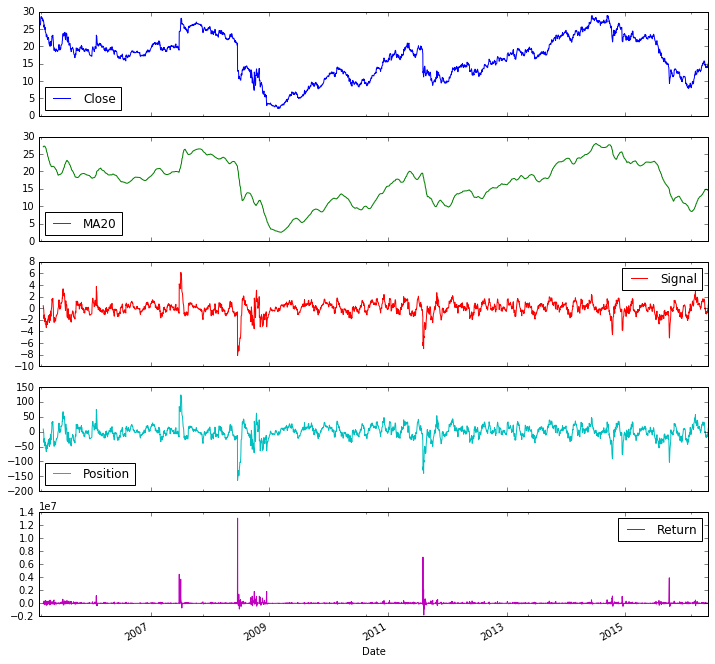

In [26]:
data.plot(subplots=True, figsize=(12,12))
#second chart smooths, 3rd chart not simply a value where 1 represents a buy, 0 as liquidate,
#and -1 to go short. In this chart we have to multiply the signal value by a multiple to generate the Position.
#(Not the best position sizing technique by a long shot but this is a toy strategy.)
#4th represents #lots held, 5th is daily returns

In [27]:
#now backtest will include slippage, commisions, other liquidity effects, risk limits
import pandas as pd
import Quandl

api_key= 'N1P8xRcmucMCx9hgYtU6'

data = Quandl.get("GOOG/TSX_HUN",authtoken= "api_key")['Close'].to_frame()
data['MA20'] = pd.rolling_mean(data['Close'],20, min_periods=10) #can carry on if missing data
data['Signal'] = data['Close'] - data['MA20']
data['NextPosition'] = (data['Signal'] *20).clip(-5., +5.).round() #can only hold an integer number of contracts
data['Position'] = data['NextPosition'].shift(1) #look ahead bias, basing signals on the current day’s closing price,need to lag the data
data['Trade'] = data['NextPosition'] - data['Position']
data['Costs'] = data['Trade'].abs() * 100.
data['Return'] = (data['Close'].diff() * data['Position'] * 10000.) - data['Costs']

print(data.tail())

            Close     MA20  Signal  NextPosition  Position  Trade  Costs  \
Date                                                                       
2016-05-19  13.92  14.7075 -0.7875            -5        -5      0      0   
2016-05-20  14.12  14.6525 -0.5325            -5        -5      0      0   
2016-05-23  14.53  14.6330 -0.1030            -2        -5      3    300   
2016-05-24  14.51  14.5915 -0.0815            -2        -2      0      0   
2016-05-25  15.16  14.5795  0.5805             5        -2      7    700   

            Return  
Date                
2016-05-19    4500  
2016-05-20  -10000  
2016-05-23  -20800  
2016-05-24     400  
2016-05-25  -13700  


In [29]:
# http://pmorissette.github.io/ffn/ffn.html
import ffn

C:\Users\msteinme\AppData\Local\Continuum\Anaconda3\lib\site-packages\pandas\io\data.py:35: FutureWarning: 
The pandas.io.data module is moved to a separate package (pandas-datareader) and will be removed from pandas in a future version.
After installing the pandas-datareader package (https://github.com/pydata/pandas-datareader), you can change the import ``from pandas.io import data, wb`` to ``from pandas_datareader import data, wb``.
  FutureWarning)


In [30]:
prices = ffn.get('aapl,msft', start='2010-01-01')

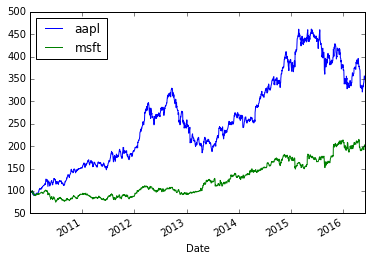

In [31]:
# let's compare the relative performance of each stock
# we will rebase here to get a common starting point for both securities
ax = prices.rebase().plot()

In [32]:
# now what do the return distributions look like?
returns = prices.to_returns().dropna()
ax = returns.hist(figsize(10, 5))

NameError: name 'figsize' is not defined

In [33]:
# ok now what about some performance metrics?
stats = prices.calc_stats()
stats.display()

Stat                 aapl        msft
-------------------  ----------  ----------
Start                2010-01-04  2010-01-04
End                  2016-06-01  2016-06-01
Risk-free rate       0.00%       0.00%

Total Return         249.87%     102.91%
Daily Sharpe         0.87        0.59
CAGR                 21.59%      11.68%
Max Drawdown         -43.80%     -26.37%

MTD                  -1.40%      -0.28%
3m                   -1.46%      1.22%
6m                   -15.12%     -2.93%
YTD                  -5.38%      -3.39%
1Y                   -23.03%     15.01%
3Y (ann.)            17.63%      17.30%
5Y (ann.)            16.72%      19.98%
10Y (ann.)           21.59%      11.68%
Since Incep. (ann.)  21.59%      11.68%

Daily Sharpe         0.87        0.59
Daily Mean (ann.)    23.16%      13.82%
Daily Vol (ann.)     26.77%      23.53%
Daily Skew           -0.15       0.05
Daily Kurt           4.09        7.04
Best Day             8.87%       10.45%
Worst Day            -12.36%     -1

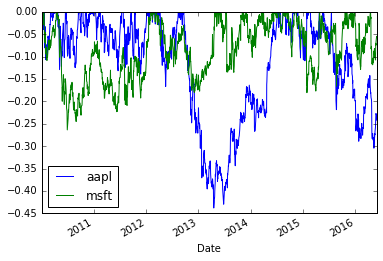

In [34]:
ax = stats.prices.to_drawdown_series().plot()

In [62]:

import sys, getopt

def read_data(file_name):
    """Read a csv file that lists possible transactions"""
    result = list()
    with open(file_name, 'r') as file_reader:
        for line in file_reader:
            order_set = set(line.strip().split(','))
            result.append(order_set)
    return result


def support_count(orders, item_set):
    """Calculate support count of item set from orders 2D list"""
    count = 0

    for order in orders:
        if item_set.issubset(order):
            # print("Found {} in {}".format(item_set, order))
            count += 1
        else:
            # print("Didn't find {} in {}".format(item_set, order))
            pass
    return count


def support_frequency(orders, item_set):
    """Calculate support frequency of item set from orders 2D list"""
    N = len(orders)
    return support_count(orders, item_set)/float(N)


def confidence(orders, left, right):
    """Calculate confidence of item set from orders 2D list"""
    left_count = support_count(orders, left)
    right = right.union(left)
    right_count = support_count(orders, right)
    result = right_count/left_count
    return result


def apriori(orders, support_threshold, confidence_threshold):
    """Accepts a list of item sets (i.e. orders) and returns a list of
    association rules matching support and confidence thresholds. """
    candidate_items = set()

    for items in orders:
        candidate_items = candidate_items.union(items)

    # print("Candidate items are {}".format(candidate_items))

    def apriori_next(item_set=set()):
        """Accepts a single item set and returns list of all association rules
        containing item_set that match support and confidence thresholds.
        """
        result = []

        # print("Calling APN with {}".format(item_set))
        # print("Candidates are {}".format(candidate_items))

        if len(item_set) == len(candidate_items):
            # Recursion base case.
            # print("{} == {}".format(item_set, candidate_items))
            return result

        elif not item_set:
            # Initialize with every item meeting support threshold.
            # print("Initializing APN.\n")
            for item in candidate_items:
                item_set = {item}
                if support_frequency(orders, item_set) >= support_threshold:
                    # print("Item '{}' crosses support threshold".format(item))
                    result.extend(apriori_next(item_set))
                else:
                    pass

        else:
            # Given an item set, find all candidate items meeting thresholds
            for item in candidate_items.difference(item_set):
                # print("Testing {}".format(item_set.union({item})))
                if confidence(orders, item_set, {item}) >=\
                        confidence_threshold:
                    # print("\n\n{} => {} crosses confidence threshold at {}".format(item_set, item, confidence(orders, item_set, {item})))
                    if support_frequency(orders, item_set.union({item})) >=\
                            support_threshold:
                       #print("\nItem set {} crosses support threshold at {}".format(item_set.union({item}), support_frequency(orders, item_set.union({item}))))
                        result.append((item_set, item))
                        result.extend(apriori_next(item_set.union({item})))
                    else:
                        pass
                else:
                    pass

        return [rule for rule in result if rule]

    return apriori_next()


def main(argv):
    """Add command line arguments file name, support threshold, and confidence threshold"""
    try:
        opts, args = getopt.getopt(argv,"hf:s:c:",["support_threshold=","confidence_threshold="])
    except getopt.GetoptError:
        print ('file.csv -s <support_threshold> -c <confidence_threshold>')
        sys.exit(2)

    for opt, arg in opts:
        if opt == '-h':
            print ('file.csv -s <support> -c <confidence>')
            sys.exit()
        elif opt in ("-f", "--file"):
            infile = arg
        elif opt in ("-s", "--support"):
            support_threshold = float(arg)
        elif opt in ("-c", "--confidence"):
            confidence_threshold = float(arg)

    data = read_data(infile)

    final_results = ["{} => {}  s = {:0.2f}, c = {:0.2f}".format(
        item_set, item, support_frequency(data[1:], item_set.union({item})),
        confidence(data[1:], item_set, {item})) for item_set, item in apriori(
        data[1:], support_threshold, confidence_threshold)]
    for result in final_results:
        print(result)
read_data('clothes.csv')


[{'Black Pants',
  'Blue blouse',
  'Clip',
  'Earings',
  'Gray Pants',
  'Green blouse',
  'Hairband',
  'Headband',
  'Orange Pants',
  'Scarf',
  'Shorts',
  'Tshirt',
  'Undershirt'},
 {'', 'Green blouse', 'Orange Pants'},
 {'', 'Black Pants', 'Green blouse'},
 {'', 'Blue blouse', 'Clip', 'Earings'},
 {'', 'Hairband'},
 {'', 'Earings', 'Headband', 'Scarf'},
 {'', 'Gray Pants', 'Shorts', 'Undershirt'},
 {'Black Pants',
  'Blue blouse',
  'Clip',
  'Earings',
  'Gray Pants',
  'Green blouse',
  'Hairband',
  'Headband',
  'Orange Pants',
  'Scarf',
  'Shorts',
  'Tshirt',
  'Undershirt'},
 {'',
  'Black Pants',
  'Blue blouse',
  'Clip',
  'Earings',
  'Gray Pants',
  'Green blouse',
  'Hairband',
  'Headband',
  'Scarf',
  'Shorts',
  'Tshirt'},
 {'', 'Gray Pants', 'Green blouse', 'Shorts'},
 {'', 'Black Pants', 'Gray Pants', 'Orange Pants', 'Shorts', 'Undershirt'},
 {'', 'Blue blouse', 'Earings'},
 {'', 'Blue blouse', 'Green blouse'},
 {'', 'Blue blouse', 'Earings', 'Orange Pants'

### Text analysis
[Top](#table-of-contents)

In [68]:
tweet='We have some delightful new food in the cafeteria. Awesome!!!'
positive_words = ['awesome','good','nice','super','fun']
positive_words.append('delightful') # this just added the word delightful to the list
negative_words = ['awful','lame','horrible','bad']
emotional_words = negative_words + positive_words
words= tweet.split(' ')
for word in words:
    if word in positive_words:
        print(word)


delightful


In [75]:
import pandas as pd
data = pd.read_csv('segmentation.csv')
data.head(3)

,Parent Name,Region,Account Manager,2013 Urea,2013 UAN,2013 Ammonia,2013 Amm Sulfate,2013 DAP,2013 MAP-MAP-50-MES,2013 TSP,...,2015 Total,2015 Margin Score,2015 Total Strat,2015 Margin Strat,2015 9-Box,Nitrogen 2015,Phosphate 2015,Potassium 2015,Other,Specialty
0,21ST CENTURY COOP AG CHEMICAL ONLY,Upper Midwest Klima,Drefke B,0,NaN,1736.616,NaN,NaN,897.64,NaN,...,4292.87,3.630056,Yellow,Red,YellowRed,3094.7565,845.67,352.44,0,0
1,2K AGRI SERVICES INC,Southern Plains Klima,Mull K,0,0,NaN,NaN,NaN,NaN,NaN,...,251.70,5.746487,Red,Yellow,RedYellow,251.7012,0.00,0.00,0,0
2,5 STAR COOP FERTILIZER CO,Upper Midwest Klima,Doyle K,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.00,0.000000,NaN,NaN,NaN,0.0000,0.00,0.00,0,0


In [82]:
matrix = data.pivot_table(index=['Parent Name'], columns=['2015 Total'])
matrix = matrix.fillna(0).reset_index()
x_cols = matrix.columns[1:]

In [78]:
from sklearn.cluster import KMeans

cluster = KMeans(n_clusters=5)
# slice matrix so we only include the 0/1 indicator columns in the clustering
matrix['cluster'] = cluster.fit_predict(matrix[matrix.columns[2:]])
matrix.cluster.value_counts()

0    1527
4       1
3       1
2       1
1       1
Name: cluster, dtype: int64

In [79]:
#more applicable for the url below
#http://blog.yhat.com/posts/customer-segmentation-using-python.html
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
matrix['x'] = pca.fit_transform(matrix[x_cols])[:,0]
matrix['y'] = pca.fit_transform(matrix[x_cols])[:,1]
matrix = matrix.reset_index()

customer_clusters = matrix[['Parent Name', 'cluster', 'x', 'y']]
customer_clusters.head()

,Parent Name,cluster,x,y
2015 Total,,,,
0,21ST CENTURY COOP AG CHEMICAL ONLY,0,230.876636,-225.714237
1,2K AGRI SERVICES INC,0,230.778371,-225.610454
2,5 STAR COOP FERTILIZER CO,0,230.778133,-225.610203
3,5-J FEED and FARM SUPPLY INC,0,230.778146,-225.610216
4,A T SMITH FERTILIZER and LIME,0,230.778133,-225.610203
